In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./uniprot_antiviral.csv")
df.head()

,query,accession,protein_name,ec_numbers,organism_name,taxon_id,ineage,sequence,length,go_terms,pfam_ids,alphafold_ids,pdb_ids
0,antiviral AND reviewed:true,A0A024B7W1,Genome polyprotein,NaN,Zika virus (isolate ZIKV/Human/French Polynesi...,2043570,"['Viruses', 'Riboviria', 'Orthornavirae', 'Kit...",MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,3423,"['GO:0005813', 'GO:0005576', 'GO:0044167', 'GO...","['PF20907', 'PF01003', 'PF07652', 'PF21659', '...",[],"['5GOZ', '5GP1', '5H30', '5H32', '5H37', '5IRE..."
1,antiviral AND reviewed:true,A0A068A9T2,Cytochrome P450 monooxygenase orf3,['1.-.-.-'],Eupenicillium brefeldianum,1131482,"['Eukaryota', 'Fungi', 'Dikarya', 'Ascomycota'...",MFDIYDYSPRLVALGLIAATIIIYSFTLTVYRLFFHPLARIPGPKL...,513,"['GO:0016020', 'GO:0020037', 'GO:0005506', 'GO...",['PF00067'],['A0A068A9T2'],[]
2,antiviral AND reviewed:true,A0A068A9T3,Probable C2H2-type zinc-finger transcription f...,NaN,Eupenicillium brefeldianum,1131482,"['Eukaryota', 'Fungi', 'Dikarya', 'Ascomycota'...",MSGSSEPYSDEPSQHNTHRFIDQIPDYPWDDYSGPPLQQSRGYSSQ...,248,"['GO:0005634', 'GO:0008270']",[],['A0A068A9T3'],[]
3,antiviral AND reviewed:true,A0A068AA78,Cytochrome P450 monooxygenase orf5,['1.-.-.-'],Eupenicillium brefeldianum,1131482,"['Eukaryota', 'Fungi', 'Dikarya', 'Ascomycota'...",MANDVSGLGPTAFVRLLAFHLIGLFVSITVYRLFFHNLSGFRGPFI...,489,"['GO:0016020', 'GO:0020037', 'GO:0005506', 'GO...",['PF00067'],['A0A068AA78'],[]
4,antiviral AND reviewed:true,A0A068AA98,Cytochrome P450 monooxygenase orf4,['1.-.-.-'],Eupenicillium brefeldianum,1131482,"['Eukaryota', 'Fungi', 'Dikarya', 'Ascomycota'...",MYHLIPFAAILGMTYALSLAIYRLFLSPLAKFPGPKLAAVTGWVET...,508,"['GO:0020037', 'GO:0005506', 'GO:0004497', 'GO...",['PF00067'],['A0A068AA98'],[]


In [4]:
df = df[["sequence"]]
df

,sequence
0,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
1,MFDIYDYSPRLVALGLIAATIIIYSFTLTVYRLFFHPLARIPGPKL...
2,MSGSSEPYSDEPSQHNTHRFIDQIPDYPWDDYSGPPLQQSRGYSSQ...
3,MANDVSGLGPTAFVRLLAFHLIGLFVSITVYRLFFHNLSGFRGPFI...
4,MYHLIPFAAILGMTYALSLAIYRLFLSPLAKFPGPKLAAVTGWVET...
...,...
3830,MVKTANSAYDNFIKNSVDLDSEQTGIARNSRDWLYGNLKNFPKVVE...
3831,MLEKQNSEENIELLRAMRYCYNKSKIFYAVRISISILIPILSISIY...
3832,MAVKSIKVKLRLDDMPEIRAGLWKLHKEVNAGVRYYTEWLSLLRQE...
3833,MYMKITKIDGVSHYKKQDKGILKKKWKDLDERKQREKIEARYNKQI...


In [6]:
def is_canon(seq):
    """
    Check if the sequence is a canonical sequence.
    """
    aa_symbols = set("ACDEFGHIKLMNPQRSTVWY")
    return all(aa in aa_symbols for aa in seq)

In [12]:
df["is_canonical"] = df["sequence"].apply(is_canon)
df.head()

,sequence,length,is_canonical
0,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,3423,True
1,MFDIYDYSPRLVALGLIAATIIIYSFTLTVYRLFFHPLARIPGPKL...,513,True
2,MSGSSEPYSDEPSQHNTHRFIDQIPDYPWDDYSGPPLQQSRGYSSQ...,248,True
3,MANDVSGLGPTAFVRLLAFHLIGLFVSITVYRLFFHNLSGFRGPFI...,489,True
4,MYHLIPFAAILGMTYALSLAIYRLFLSPLAKFPGPKLAAVTGWVET...,508,True


In [ ]:
# Antes mostrar como funciona apply con otro ejemplo
df["length"] = df["sequence"].apply(len)
df.head()

,sequence,length
0,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,3423
1,MFDIYDYSPRLVALGLIAATIIIYSFTLTVYRLFFHPLARIPGPKL...,513
2,MSGSSEPYSDEPSQHNTHRFIDQIPDYPWDDYSGPPLQQSRGYSSQ...,248
3,MANDVSGLGPTAFVRLLAFHLIGLFVSITVYRLFFHNLSGFRGPFI...,489
4,MYHLIPFAAILGMTYALSLAIYRLFLSPLAKFPGPKLAAVTGWVET...,508


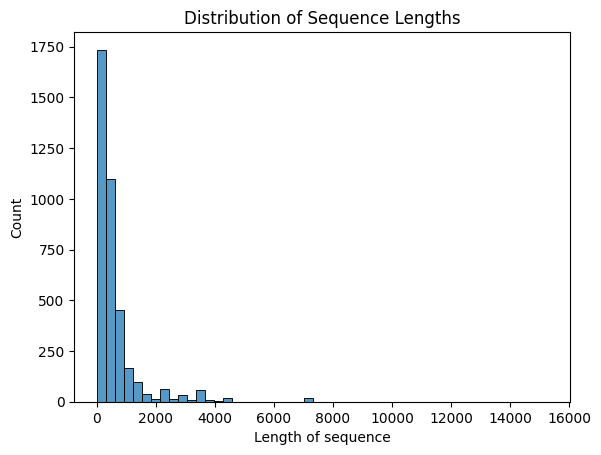

In [21]:
sns.histplot(x=df["length"], bins=50)
plt.xlabel("Length of sequence")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

In [ ]:
df1 = pd.DataFrame({
    "sequence": ["ABCD", "EFGH", "IJKL"],
    "name": ["seq1", "seq2", "seq3"],
    "length": [4, 4, 4]
})
df2 = pd.DataFrame({
    "sequence": ["ABCD", "EFGH", "MNOP"],
    "name": ["seq1", "seq2", "seq4"],
    "length": [4, 4, 4]
})

,sequence,name_x,length_x,name_y,length_y
0,ABCD,seq1,4,seq1,4
1,EFGH,seq2,4,seq2,4


In [30]:
# Ejemplo que no funciona
pd.concat([df1, df2], axis=0, ignore_index=True).drop_duplicates(subset=["sequence"]).reset_index(drop=True)

,sequence,name,length
0,ABCD,seq1,4
1,EFGH,seq2,4
2,IJKL,seq3,4
3,MNOP,seq4,4


In [ ]:
# Ejemplos que no funciona pero puede ser utilizado en obtener los que esten en ambos dataframes
df1.merge(df2, on="sequence")

In [ ]:
# Contar secuencias
pd.concat([df1["sequence"], df2["sequence"]]).value_counts()

sequence
ABCD    2
EFGH    2
IJKL    1
MNOP    1
Name: count, dtype: int64

In [34]:
def count_by_length_bin(df, bin_size=10):
    # Creamos los intervalos de bin_size en bin_size
    bins = range(0, df["length"].max() + bin_size, bin_size)
    df["length_bin"] = pd.cut(df["length"], bins=bins, right=False)
    return df["length_bin"].value_counts().sort_index()

In [39]:
count_by_length_bin(df, bin_size=10).sort_values(ascending=False)

length_bin
[90, 100)       189
[230, 240)      148
[190, 200)      119
[150, 160)      119
[100, 110)      101
               ... 
[6580, 6590)      0
[6570, 6580)      0
[6560, 6570)      0
[6550, 6560)      0
[6660, 6670)      0
Name: count, Length: 1529, dtype: int64